In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cancer_Data.csv')
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isna().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:

Y_df = df['diagnosis']
df = df.drop(['Unnamed: 32','id'],axis=1)
Y_df.shape
y_df = Y_df.copy()
y_df.head(25)



,diagnosis
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,M
8,M
9,M


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_df = le.fit_transform(Y_df)
Y_df = pd.DataFrame(Y_df, columns = ['diagnosis'])
Y_df.shape




(569, 1)

Label encoding
M --> 1
B --> 0
,Standerdizing the features


In [ ]:
X_df = df.drop(['diagnosis'],axis=1)
X_df.shape
mean = np.mean(X_df, axis=0)
std = np.std(X_df, axis=0)

X_mean = X_df.mean()
X_std = X_df.std()


X_standardized = (X_df - X_mean) / X_std
X_standardized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [ ]:
df = pd.DataFrame(X_standardized, columns = X_df.columns)
#df = df.drop(['diagnosis'])
df.describe()
#print("Mean after standardization:\n", X_standardized.mean())
#print("Standard deviation after standardization:\n", X_standardized.std())


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.311195e-16,6.243785e-17,-1.123881e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,2.497514e-17,-4.995028e-17,1.748260e-16,4.838933e-16,...,-8.241796e-16,0.000000,-3.496520e-16,1.248757e-17,-2.372638e-16,-3.246768e-16,8.741299e-17,2.247763e-16,2.747265e-16,-5.744282e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039,-1.691872e+00,-1.221348e+00,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-0.747971,-6.889721e-01,-6.415713e-01,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-0.043477,-2.857288e-01,-3.408813e-01,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,0.657762,5.398040e-01,3.572747e-01,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489,4.283568e+00,5.924959e+00,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


# LOGISTIC CLASSIFICATION

defining sigmoid function


In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Defining Cost function

In [ ]:
def cost_function(X,y,W,b):
    m = X.shape[0]
    # X = np.array(X)
    z = np.dot(X, W)+b
    h = sigmoid(z)
    print(h)
    epsilon = 1e-8
    cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Deifning Gradient Descent and feature Importance

In [ ]:
def gradient_D(X, y, W, b, alpha, iterations):
    m = X.shape[0]
    cost_history = []
    # X = np.array(X)

    for i in range(iterations):
        # X= np.array(X)
        # print(X)
        z = np.dot(X,W) + b
        h = sigmoid(z)

        dW = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)

        W -= alpha * dW
        b -= alpha * db

        cost = cost_function(X, y, W, b)
        print(cost)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4}")

        #Early stopping if cost change is minimal
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            print(f"Early stopping at iteration {i}")
            break

    feature_importance = np.abs(W).flatten()
    sorted_indices = np.argsort(-feature_importance)

    print("\nFeature Importance (|W|):")
    print("Feature Importance Shape:", feature_importance.shape)

    for idx in sorted_indices:
        print(f"Feature {idx+1}: {feature_importance[idx]:.4f}")
    return W, b, cost_history, feature_importance




# Defining Logistic regression

In [ ]:
def train_logistic_regression(X, y, alpha=0.001, iterations=1000):
    n_features = X.shape[1]
    W = np.zeros((n_features, 1))
    b = 0
    return gradient_D(X, y, W, b, alpha, iterations)

In [ ]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# train test split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42, stratify=y_df)

log_reg = LogisticRegression(class_weight='balanced', solver='liblinear')  # Using 'balanced' to handle class imbalance.
log_reg.fit(Xl_train, yl_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

yl_pred = log_reg.predict(Xl_test)

# Evaluate model
accuracy_l = accuracy_score(yl_test, yl_pred)
print(f"Accuracy: {accuracy_l * 100:.2f}%")
print(classification_report(yl_test, yl_pred))

Accuracy: 94.74%
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# SUPPORT VECTOR MACHINES WITH LINEAR KERNAL


diagnosis
-1    357
 1    212
Name: count, dtype: int64


<ipython-input-21-84d54eda0553>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_df = y_df.replace({'M': 1, 'B': -1})


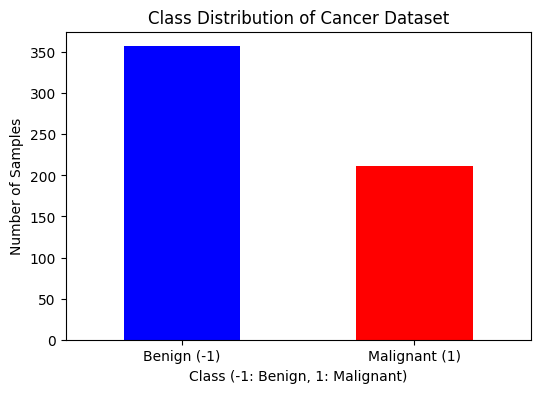

In [ ]:
y_df = y_df.replace({'M': 1, 'B': -1})
# Converting back to DataFrame
Y_df = pd.DataFrame(Y_df, columns=['diagnosis'])
print(y_df.value_counts())

# Plotting  class imbalance.
plt.figure(figsize=(6, 4))
y_df.value_counts().plot(kind='bar', color=['blue', 'red'])

plt.xlabel("Class (-1: Benign, 1: Malignant)")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Cancer Dataset")
plt.xticks(ticks=[0, 1], labels=["Benign (-1)", "Malignant (1)"], rotation=0)
plt.show()


# As the Logisitic regression accuracy is low, we can say that, the Data points are Non-linear. Hence using rbf kernal as optimisation is the better approach.

In [ ]:
X_sv_train, X_sv_test, y_sv_train, y_sv_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42, stratify=Y_df)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', C=3, gamma= 'scale', class_weight = 'balanced')
classifier.fit(X_sv_train, y_sv_train)

y_sv_pred = classifier.predict(X_sv_test)
accuracy_sv = accuracy_score(y_sv_test, y_sv_pred)
print(f"Accuracy: {accuracy_sv * 100}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 93.85964912280701


In [ ]:
from sklearn.metrics import accuracy_score

# Predicting on training data
y_sv_train_pred = classifier.predict(X_sv_train)

# Calculating training accuracy
train_accuracy = accuracy_score(y_sv_train, y_sv_train_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


Training Accuracy: 98.02%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# calculating evalution metrics
cm_sv = confusion_matrix(y_sv_test, y_sv_pred)
print(classification_report(y_sv_test, y_sv_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
y_sv_pred # because, scikit-learn internally converts to [0,1] if it notices any kind of binary classes.

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1])

In [3]:
!git config --global user.email "sadam.veekshith007@gmail.com"
!git config --global user.name "VeeXD"
!git clone https://REMOVED_TOKEN@github.com/VeeXD/Logistic_Regression_Cancer_Class.git
%cd Logistic_Regression_Cancer_Class
!git add .
!git commit -m "Log_Reg and SVM"
!git push origin main

Cloning into 'Logistic_Regression_Cancer_Class'...
/content/Logistic_Regression_Cancer_Class
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/VeeXD/Logistic_Regression_Cancer_Class.git'


# DECISION TREE CLASSIFIER.